<a href="https://colab.research.google.com/github/migvanderlei/rna-2-1/blob/main/rna_rosenblatt_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais – Atividade Avaliativa 2.1

Autores:
* Leticia Magalhães Mendes - 1815080016
* Miguel Vanderlei de Oliveira - 1815310039

O objetivo deste notebook é implementar o algoritmo de treinamento mediante **Aprendizado Supervisionado** do **neurônio Perceptron de Rosenblatt** aplicado em problemas de **classificação**.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [13]:
class Perceptron():
  def __init__(self, entrada, saida, taxa_aprendizado=0.1, range_pesos=(-1, 1), max_epocas=-1, degrau=0, imprime=True):
        self.vies = np.negative(np.ones(len(entrada))).reshape(-1,1)
        self.entrada = np.append(self.vies, entrada, axis = 1)
        self.saida = saida
        self.n_atributos = len(self.entrada[0])
        self.pesos = np.random.uniform(range_pesos[0], range_pesos[1], self.n_atributos)
        self.taxa_aprendizado = taxa_aprendizado
        self.max_epocas = max_epocas
        self.imprime = imprime
        self.degrau = degrau
        self.n_amostras = len(self.entrada)
        self.num_total_ajustes = 0
        self.n_epocas = 0

  def ativacao(self, u):
        return 1 if u >= self.degrau else 0

  def treinar(self):
        if self.imprime:
          print("---- Vetor inicial de pesos: ", self.pesos)
        self.n_epocas = 1
        self.num_total_ajustes = 0

        while True:
            erro = False
            n_ajustes = 0
            if self.imprime:
              print(f"---- Época {self.n_epocas} ----")
            for i in range(self.n_amostras):
                u = 0
                for j in range(self.n_atributos):
                    u+= self.entrada[i][j] * self.pesos[j]
                
                y = self.ativacao(u)

                if y != self.saida[i]:
                    self.num_total_ajustes+=1
                    if self.imprime:
                      print("Ajuste: ", self.pesos)
                    n_ajustes += 1

                    erro_aux = self.saida[i] - y

                    for j in range(self.n_atributos):
                        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado * erro_aux * self.entrada[i][j]
                    erro = True
            if self.imprime:
              print(f"---- Fim da época {self.n_epocas} com {n_ajustes} ajustes ----")
            
            if self.max_epocas == -1:
              if not erro:
                 break
            elif self.n_epocas >= self.max_epocas:
              break

            self.n_epocas+=1

        if self.imprime:
          print("---- Número total de ajustes: ", self.num_total_ajustes)
          print("---- Número de épocas até a convergência: ", self.n_epocas-1)

        if not self.imprime:
          return {
              "num_total_ajustes": self.num_total_ajustes,
              "n_epocas": self.n_epocas-1,
              "pesos": self.pesos
          }


# Parte I - Problema linearmente separável

In [14]:
dataAll = np.fromfile('dataAll.txt').reshape(-1, 3)
entrada = dataAll[: , :2]
saida = dataAll[:,2:]

In [16]:
p = Perceptron(entrada, saida, range_pesos=(-0.5, 0.5))
p.treinar()

---- Vetor inicial de pesos:  [ 0.41216261  0.12380572 -0.2058993 ]
---- Época 1 ----
Ajuste:  [ 0.41216261  0.12380572 -0.2058993 ]
Ajuste:  [ 0.31216261 82.72250572 79.6499307 ]
Ajuste:  [  0.21216261 135.31103572 -19.0191293 ]
Ajuste:  [  0.31216261  95.30212572 -96.9118193 ]
Ajuste:  [  0.41216261 144.76294572 -48.0177693 ]
Ajuste:  [   0.51216261  105.21369572 -145.1118093 ]
Ajuste:  [  0.61216261 197.45567572 -58.6392393 ]
Ajuste:  [  0.71216261 185.55856572 -86.5387793 ]
Ajuste:  [   0.81216261  157.35110572 -120.1228993 ]
Ajuste:  [   0.71216261   92.65784572 -201.4940293 ]
Ajuste:  [   0.81216261  131.03213572 -182.2300293 ]
Ajuste:  [   0.91216261  201.22587572 -115.0043493 ]
Ajuste:  [   0.81216261  136.93666572 -183.0689793 ]
Ajuste:  [   0.91216261  201.92782572 -122.1772993 ]
Ajuste:  [   0.81216261  150.99424572 -185.5772693 ]
Ajuste:  [   0.71216261  226.97756572 -121.3975993 ]
Ajuste:  [   0.61216261  162.86780572 -209.7432993 ]
Ajuste:  [   0.71216261  250.00256572 -1

In [17]:
def plot(data, pesos, titulo=''):
  x = np.arange(min(data[:,:1]),max(data[:,:1]), 0.1)

  plt.plot(x, pesos[0]/pesos[2] - (pesos[1]/pesos[2] * x), 'k', linewidth=2)

  for item in data:
    if item[2] == 0:
      plt.scatter(item[0], item[1], color="red")
    else:
      plt.scatter(item[0], item[1], color="blue")

  if titulo:
    plt.title(titulo)

  plt.show()

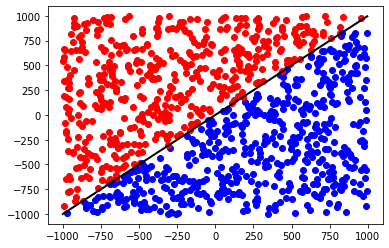

In [18]:
plot(dataAll, p.pesos)

# Parte II - Experimentação

In [7]:
n = int((6+9)/4) # 3

data = np.fromfile(f"data{n}.txt").reshape(-1, 3)
entrada = data[:, :2]
saida = data[:, 2:]

In [8]:
conjunto_taxas = [0.4, 0.1, 0.01]
conjunto_pesos = [(-100, 100), (-0.5, 0.5)]

conjunto_parametros = []

for taxa in conjunto_taxas:
  for pesos in conjunto_pesos:
    conjunto_parametros.append(
        {
            "params": f"taxa: {taxa} - pesos: {pesos}",
            "taxa": taxa,
            "pesos": pesos
        }
    )
print(conjunto_parametros)

[{'params': 'taxa: 0.4 - pesos: (-100, 100)', 'taxa': 0.4, 'pesos': (-100, 100)}, {'params': 'taxa: 0.4 - pesos: (-0.5, 0.5)', 'taxa': 0.4, 'pesos': (-0.5, 0.5)}, {'params': 'taxa: 0.1 - pesos: (-100, 100)', 'taxa': 0.1, 'pesos': (-100, 100)}, {'params': 'taxa: 0.1 - pesos: (-0.5, 0.5)', 'taxa': 0.1, 'pesos': (-0.5, 0.5)}, {'params': 'taxa: 0.01 - pesos: (-100, 100)', 'taxa': 0.01, 'pesos': (-100, 100)}, {'params': 'taxa: 0.01 - pesos: (-0.5, 0.5)', 'taxa': 0.01, 'pesos': (-0.5, 0.5)}]


In [9]:
resultados = []

for config in conjunto_parametros:
  resultados_conjunto = []
  for i in range(10):
    p = Perceptron(entrada, saida, taxa_aprendizado=config['taxa'], range_pesos=config['pesos'], imprime=False)
    resultados_conjunto.append(
        p.treinar()
    )
  resultados.append(resultados_conjunto)

print(resultados)

[[{'num_total_ajustes': 242, 'n_epocas': 13, 'pesos': array([53.76614341, 93.4538534 , 20.25073822])}, {'num_total_ajustes': 307, 'n_epocas': 6, 'pesos': array([18.99593833, 25.39507339,  9.74568893])}, {'num_total_ajustes': 660, 'n_epocas': 12, 'pesos': array([ 7.74043271, 27.99157238, -9.3562623 ])}, {'num_total_ajustes': 103, 'n_epocas': 29, 'pesos': array([ 26.38601148,  96.17847599, -32.93937552])}, {'num_total_ajustes': 132, 'n_epocas': 12, 'pesos': array([ 35.10730106,  99.41465908, -25.8933112 ])}, {'num_total_ajustes': 119, 'n_epocas': 9, 'pesos': array([ 31.61806994,  73.628332  , -13.57577491])}, {'num_total_ajustes': 382, 'n_epocas': 15, 'pesos': array([ 10.21438383,  37.24368086, -12.5530853 ])}, {'num_total_ajustes': 110, 'n_epocas': 12, 'pesos': array([41.24004327, 78.66562793, 12.80301479])}, {'num_total_ajustes': 344, 'n_epocas': 36, 'pesos': array([ 29.31667012, 107.0689089 , -36.7177054 ])}, {'num_total_ajustes': 216, 'n_epocas': 18, 'pesos': array([ 15.25943089,  54

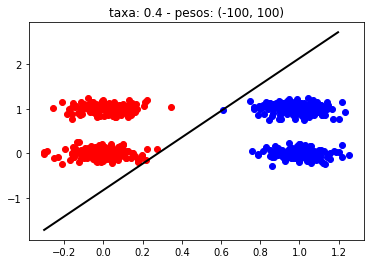

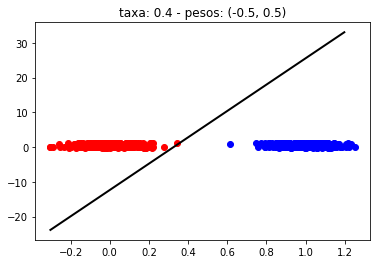

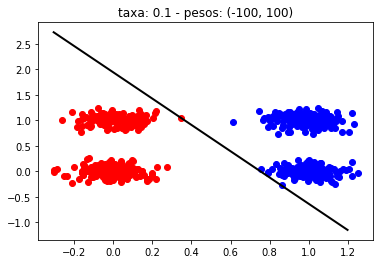

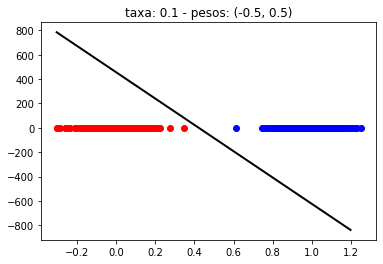

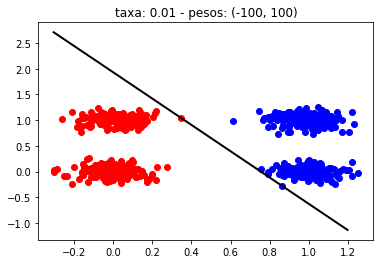

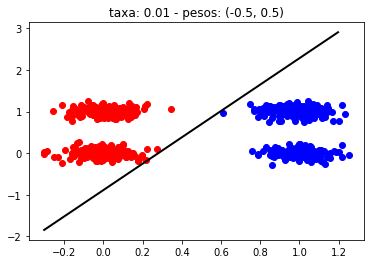

In [10]:
for resultado, idx in zip(resultados, range(6)):
  plot(data, resultado[-1]["pesos"], conjunto_parametros[idx]["params"])

In [11]:
tabela = PrettyTable()
tabela.field_names = ['Taxa de Aprendizado', 'Intervalo de Pesos', 'Quantidade de Ajustes', 'Menor número de épocas para convergência']
for resultado, idx in zip(resultados, range(6)):
  ajustes = []
  minimo = None
  for p in resultado:
    ajustes.append(p['num_total_ajustes'])
    if minimo is None:
      minimo = p['n_epocas']
    else:
      minimo = min(minimo, p['n_epocas'])
  ajustes = np.array(ajustes)
  media = "%.2f" %(np.mean(ajustes))
  dp = "%.2f" %(np.std(ajustes))
  tabela.add_row([conjunto_parametros[idx]['taxa'], conjunto_parametros[idx]['pesos'], media + " +- " + dp, minimo])

print(tabela)

+---------------------+--------------------+-----------------------+------------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Quantidade de Ajustes | Menor número de épocas para convergência |
+---------------------+--------------------+-----------------------+------------------------------------------+
|         0.4         |    (-100, 100)     |    261.50 +- 164.26   |                    6                     |
|         0.4         |    (-0.5, 0.5)     |      8.70 +- 3.41     |                    2                     |
|         0.1         |    (-100, 100)     |   1465.80 +- 582.82   |                    8                     |
|         0.1         |    (-0.5, 0.5)     |     10.80 +- 3.71     |                    2                     |
|         0.01        |    (-100, 100)     |   9676.30 +- 6450.64  |                   175                    |
|         0.01        |    (-0.5, 0.5)     |     62.30 +- 30.85    |                    1               

# Parte III – Validação Holdout em Problema Não-Linearmente Separável